https://datafai.com/2017/11/14/linear-discriminant-analysis-lda-with-scikit/

Linear Discriminant Analysis (LDA) is similar to Principal Component Analysis (PCA) in reducing the dimensionality. However, there are certain nuances with LDA that we should be aware of-

    LDA is supervised (needs categorical dependent variable) to provide the best linear combination of original variables while providing the maximum separation among the different groups. On the other hand, PCA is unsupervised
    LDA can be used for classification also, whereas PCA is generally used for unsupervised learning
    LDA doesn’t need the numbers of discriminant to be passed on ahead of time. Generally speaking the number of discriminant will be lower of the number of variables or number of categories-1.
    LDA is more robust and can be conducted without even standardizing or normalizing the variables in certain cases
    LDA is preferred for bigger data sets and machine learning

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
wine=pd.read_csv('wine.data',header=None)
wine.columns=['Class_label','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','color_intensity','Hue','OD2080/OD315_of_diluted_wines','Proline']

In [21]:
#Data Exploration
wine.head()
wine.shape
wine.Class_label.nunique()
wine.groupby('Class_label').size()
wine.columns
means=np.round(pd.pivot_table(wine,values=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','color_intensity','Hue','OD2080/OD315_of_diluted_wines','Proline'],index='Class_label',aggfunc=np.mean),2)
means

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,color_intensity,Hue,OD2080/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 14)

3

Class_label
1    59
2    71
3    48
dtype: int64

Index(['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'color_intensity', 'Hue',
       'OD2080/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

,Alcalinity_of_ash,Alcohol,Ash,Flavanoids,Hue,Magnesium,Malic_acid,Nonflavanoid_phenols,OD2080/OD315_of_diluted_wines,Proanthocyanins,Proline,Total_phenols,color_intensity
Class_label,,,,,,,,,,,,,
1,17.04,13.74,2.46,2.98,1.06,106.34,2.01,0.29,3.16,1.90,1115.71,2.84,5.53
2,20.24,12.28,2.24,2.08,1.06,94.55,1.93,0.36,2.79,1.63,519.51,2.26,3.09
3,21.42,13.15,2.44,0.78,0.68,99.31,3.33,0.45,1.68,1.15,629.90,1.68,7.40


In [22]:
#Create Features and Labels
x=wine.drop('Class_label',axis=1)
y=wine['Class_label']
x.head()
y.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,color_intensity,Hue,OD2080/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


0    1
1    1
2    1
3    1
4    1
Name: Class_label, dtype: int64

In [23]:
#Standardize the data
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()
x_scaled.describe()

c:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,color_intensity,Hue,OD2080/OD315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,color_intensity,Hue,OD2080/OD315_of_diluted_wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,3.492836e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [24]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [25]:
#Fit LDA on training data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sklearn_lda=LinearDiscriminantAnalysis()
transf_lda=sklearn_lda.fit_transform(x_train,y_train)

In [26]:
#Explained variance
str(sklearn_lda.explained_variance_ratio_)

'[0.73846314 0.26153686]'

In [27]:
#Use LDA to make prediction on test data
from sklearn import metrics
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(y_test,sklearn_lda.predict(x_test)))

Confusion Matrix of the LDA-classifier
[[19  0  0]
 [ 1 21  0]
 [ 0  0 13]]


In [28]:
#Compute accuracy of the classification
pred_test_lda=sklearn_lda.predict(x_test)
metrics.accuracy_score(y_test,pred_test_lda)

0.9814814814814815

In [29]:
#LDA without standardizing or normalizing on the same data
x=wine.iloc[:,1:]
y=wine.iloc[:,0]
type(x)
lda=LinearDiscriminantAnalysis().fit(x,y)

pandas.core.frame.DataFrame

In [30]:
#LDs
df=pd.DataFrame(lda.scalings_,index=x.columns,columns=('LD1','LD2'))
df

,LD1,LD2
Alcohol,-0.403400,0.871793
Malic_acid,0.165255,0.305380
Ash,-0.369075,2.345850
Alcalinity_of_ash,0.154798,-0.146381
Magnesium,-0.002163,-0.000463
Total_phenols,0.618052,-0.032213
Flavanoids,-1.661191,-0.491998
Nonflavanoid_phenols,-1.495818,-1.630954
Proanthocyanins,0.134093,-0.307088
color_intensity,0.355056,0.253231


In [31]:
#Explained variance
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<Figure size 1080x1080 with 0 Axes>

Text(0.5, 0, 'LD 1')

Text(0, 0.5, 'LD 2')

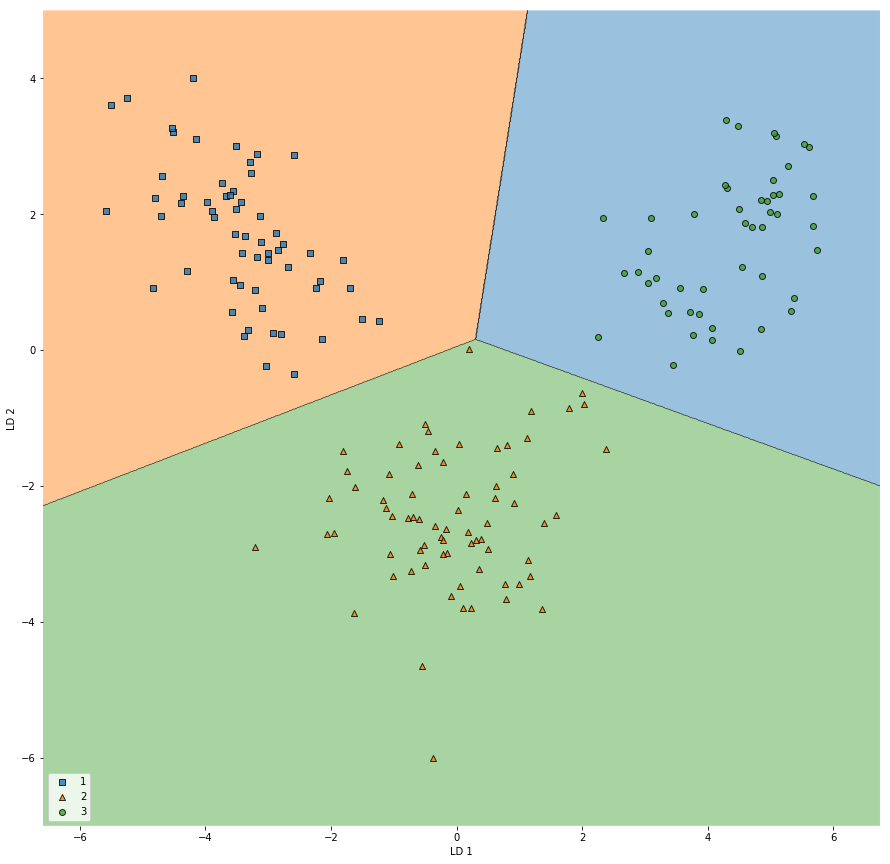

In [33]:
#Usae LDs as input in logistic regression
%matplotlib inline
import matplotlib.pyplot as plt
#from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.plotting import plot_decision_regions
lda=LDA()
from sklearn.linear_model import LogisticRegression
x_train_lda=lda.fit_transform(x,y)
y=np.array(y)
lr=LogisticRegression()
lr=lr.fit(x_train_lda,y)
plt.figure(figsize=(15,15))
plot_decision_regions(x_train_lda,y,clf=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()